<a href="https://colab.research.google.com/github/Anirudh0413/Anirudh0413/blob/main/Alfido_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1:Titanic Survival Prediction

In this context, "Titanic Prediction" refers to the task of using machine learning algorithms and statistical analysis to predict whether passengers on the Titanic survived or not, based on various attributes and features such as age, gender, passenger class, and more.

The dataset typically includes information about each passenger, including whether they survived or perished, and details about their demographic and travel-related characteristics.


 the following attributes:
 PassengerId: Passenger identification number
 Survived:survival status ('Survived' with 0 indicating not survived and 1 indicating survived)
 Pclass:passenger class
 Name:name of the passenger
 Sex:gender
 Age:old,adult,Teenager,children
 SibSp:the number of siblings or spouses onboard
 Parch:the number of parents or children onboard
 Ticket:ticket in formation
 Fare:fare paid
 Cabin:cabin in formation
 Embarked: the port where they embarked

Importing Libraries

In [60]:
from sklearn import model_selection
!pip install sklearn

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix #model evaluation metrics

Exploratory Data Analysis

In [62]:
df=pd.read_csv("/content/tested.csv")

In [63]:
df.head() #display the rows from the top of the dataframe(defaultly it shows 5 rows)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [65]:
df.describe().round(3) #calculating statistical values and roundinf them to 3 decimal places

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.000,418.000,332.000,418.000,418.000,417.000
mean,1100.50,0.364,2.266,30.273,0.447,0.392,35.627
std,120.81,0.482,0.842,14.181,0.897,0.981,55.908
min,892.00,0.000,1.000,0.170,0.000,0.000,0.000
25%,996.25,0.000,1.000,21.000,0.000,0.000,7.896
50%,1100.50,0.000,3.000,27.000,0.000,0.000,14.454
75%,1204.75,1.000,3.000,39.000,1.000,0.000,31.500
max,1309.00,1.000,3.000,76.000,8.000,9.000,512.329


In [66]:
df.isnull().sum() #reuturn the number of null values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [67]:
df.duplicated().sum()

0

observation from data set:
1.There are 417 rows and 12 columns
2.There are null values in Age and Cabin columns
3.There are no duplicated rows

handling nuul values and pre processing the dataset


In [68]:
df['Age'].fillna(df['Age'].median(),inplace=True) # replaces null value with median value of the column
df['Cabin'].fillna('unspecified', inplace=True) # replaces null value with 'unspecified'

In [69]:
for i in df.index:
    if df['Age'][i] < 12:
        df['Age'][i] = 'Child'
    elif df['Age'][i] >= 12 and df['Age'][i] < 18:
        df['Age'][i] = 'Teenage'
    elif df['Age'][i] >= 18 and df['Age'][i] < 25:
        df['Age'][i] = 'Young Adult'
    elif df['Age'][i] >= 25 and df['Age'][i] < 45:
        df['Age'][i] = 'Adult'
    elif df['Age'][i] >= 45 and df['Age'][i] < 65:
        df['Age'][i] = 'Middle-Age'
    else:
        df['Age'][i] = 'Elderly'

<ipython-input-69-18f0d1d10581>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = 'Adult'


In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,Adult,0,0,330911,7.8292,unspecified,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,Middle-Age,1,0,363272,7.0000,unspecified,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,Middle-Age,0,0,240276,9.6875,unspecified,Q
3,895,0,3,"Wirz, Mr. Albert",male,Adult,0,0,315154,8.6625,unspecified,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Young Adult,1,1,3101298,12.2875,unspecified,S


Data Visualization

Ratio of male and female passengers

<Axes: >

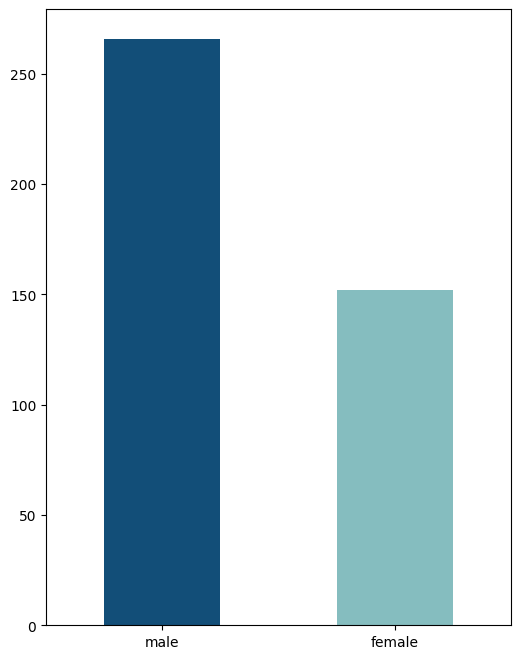

In [71]:
color = ['#124E78', '#85BDBF']
df['Sex'].value_counts().plot.bar(figsize=(6,8), color=color, rot=0)

Ratio of passengers that survived and did not survived

<Axes: >

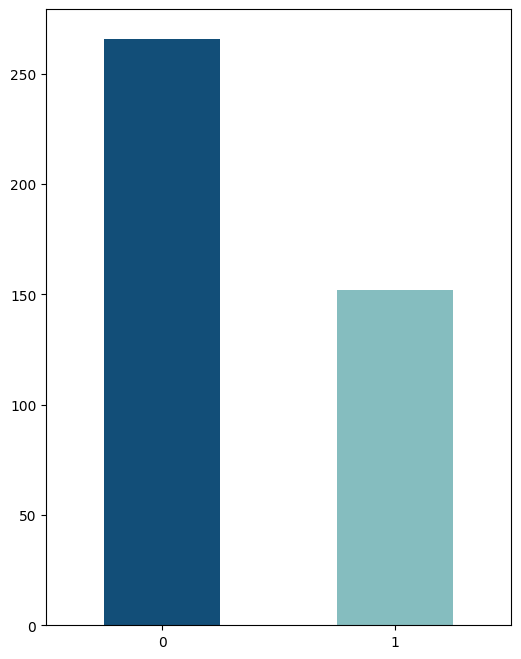

In [72]:
color = ['#124E78', '#85BDBF']
df['Survived'].value_counts().plot.bar(figsize=(6,8), color=color, rot=0)

Percentage of Values in Age

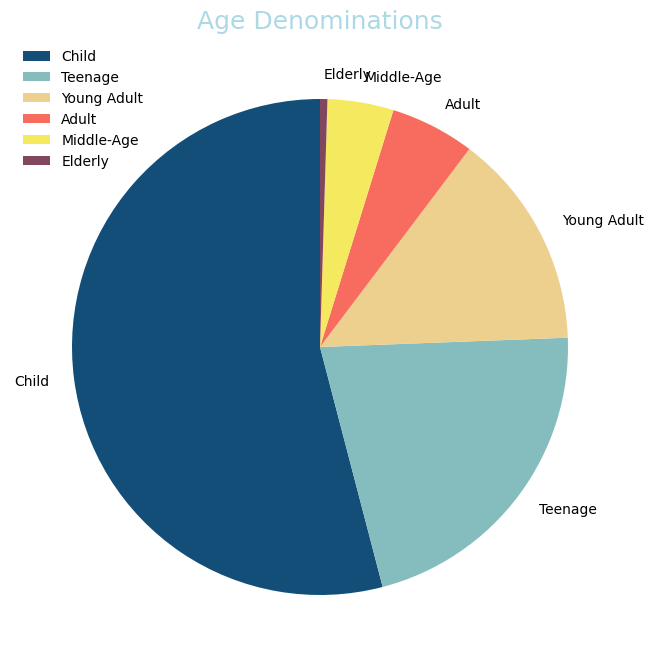

In [73]:
fig = plt.figure()
color = ['#124E78', '#85BDBF', '#EDCF8E', '#F76C5E', '#F5E960', '#80475E']
label = ['Child', 'Teenage', 'Young Adult', 'Adult', 'Middle-Age', 'Elderly']
plt.pie(df['Age'].value_counts(), colors=color, labels=label, startangle=90)
fig.patch.set_facecolor('white')
fig.set_size_inches(8, 9)
plt.legend(edgecolor='white', frameon=False)
plt.title('Age Denominations', fontsize=18, color='lightblue')
plt.show()

In [74]:
# Encodes columns Age and Sex using One Hot Encoder
ohe_columns = ['Age', 'Sex']
ohe = OneHotEncoder(sparse=False).fit(df[ohe_columns])
encoded = ohe.transform(df[ohe_columns])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
df = pd.concat([df[[x for x in df.columns if x not in ohe_columns]].reset_index(drop=True),encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Adult,Age_Child,Age_Elderly,Age_Middle-Age,Age_Teenage,Age_Young Adult,Sex_female,Sex_male
0,892,0,3,"Kelly, Mr. James",0,0,330911,7.8292,unspecified,Q,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,7.0000,unspecified,S,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,894,0,2,"Myles, Mr. Thomas Francis",0,0,240276,9.6875,unspecified,Q,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,895,0,3,"Wirz, Mr. Albert",0,0,315154,8.6625,unspecified,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,12.2875,unspecified,S,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Preparing data for training the model

In [76]:
# Dropping unnecessary columns
df.drop(['PassengerId','Ticket','Name','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [77]:
# Seperating Target column from the rest of the dataset
columns = [c for c in df.columns if c != 'Survived']
X = df[columns]
Y = df['Survived']

In [78]:
# Splitting dataset for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

Model Training


In [79]:
# Using Logistic Regression to classify people into suvivors and non-suvivors
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

Evaluating the Model

In [80]:
accuracy = accuracy_score(Y_test, log.predict(X_test))
precision = precision_score(Y_test, log.predict(X_test))
recall = recall_score(Y_test, log.predict(X_test))
f1 = f1_score(Y_test, log.predict(X_test))
conf_matrix = confusion_matrix(Y_test, log.predict(X_test))

In [81]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
Accuracy: 1.0

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[122   0]
 [  0  87]]
